In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
train_accuracy_log_svm = np.load('results/train_acc_final.npy')
validation_accuracy_log_svm = np.load('results/val_acc_final.npy')
train_accuracy_ridge = np.load('results/train_acc_ridge.npy')
validation_accuracy_ridge = np.load('results/val_acc_ridge.npy')

In [10]:
POSSIBLE_LAMBDA_VALUES = [1e-6, 5e-5, 2.5e-5, 1e-5, 7.5e-4, 5e-4, 2.5e-4, 1e-4, 0]
POSSIBLE_LAMBDA_LOG = [0]
POSSIBLE_LAMBDA_SVM = [1e-2]
POSSIBLE_DEGREES = np.arange(5, 14)
grid_shape = (4, 3, len(POSSIBLE_DEGREES), len(POSSIBLE_LAMBDA_VALUES), 2)

In [4]:
train_accuracy_log_svm.shape, train_accuracy_ridge.shape, validation_accuracy_log_svm.shape, validation_accuracy_ridge.shape

((4, 2, 9, 1, 2), (4, 1, 9, 9, 2), (4, 2, 9, 1, 2), (4, 1, 9, 9, 2))

In [5]:
def plot_grid_search_results(loss_array, lambdas, degrees, text='Validation'):
    plt.figure(figsize=(8,10))
    plt.imshow(loss_array)
    plt.colorbar(orientation='horizontal')
    plt.yticks(np.arange(degrees.shape[0]), degrees, rotation=20)
    plt.xticks(np.arange(lambdas.shape[0]), lambdas, rotation=45)
    plt.ylabel('degree')
    plt.xlabel('lambda')
    plt.title(f'{text} accuracy for different lambda and degree')
    plt.show()

In [6]:
def find_best_hyperparameters(error_values, lambdas, degrees):
    """ A function which finds the hyperparameters that give the highest accuracy
        
    Args:
        error_values (np.array) Cross-validation error values of all different 
        combinations of hyperparameters.
        lambdas (np.array): Array of different regularization coefficients to try.
        degrees (np.array): Array of different degrees coefficients to try for 
        feature expansion.

    Returns:
        (float), (int): Lambda and degree combination that result in lowest error
    """
    best_deg, best_lmbda = np.unravel_index(np.argmax(error_values), error_values.shape)
    # Extract the lambda and degree resulting in the highest accuracy.
    degree_best = degrees[best_deg]
    lambda_best = lambdas[best_lmbda]
    return (best_lmbda, lambda_best), (best_deg, degree_best) 

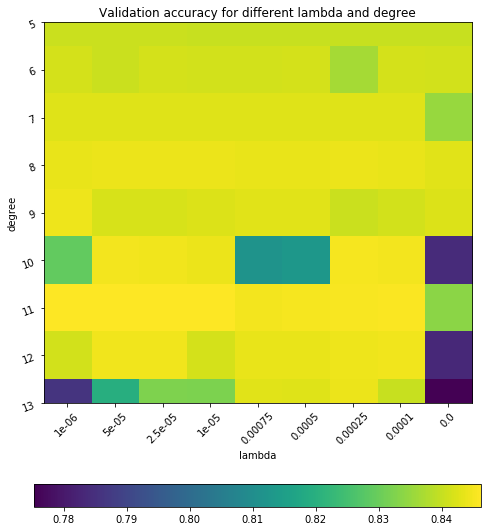

In [11]:
plot_grid_search_results(validation_accuracy_ridge[0, 0, :, :, 0], np.array(POSSIBLE_LAMBDA_VALUES), POSSIBLE_DEGREES)

In [42]:
def plot_accuracy(validation_accuracy_ridge, validation_accuracy_log_svm, train_accuracy_ridge, train_accuracy_log_svm, POSSIBLE_DEGREES, POSSIBLE_LAMBDA_VALUES, model, lim=None):
    (l_index, _), _ = find_best_hyperparameters(validation_accuracy_ridge[model, 0, :, :, 0], POSSIBLE_LAMBDA_VALUES, POSSIBLE_DEGREES)
    fig = plt.figure(figsize=(15, 10))
    #plt.style.use('seaborn-whitegrid')
    plt.title(f'Accuracy per degree of polynomial expension for PRI_JET_NUM={model}', fontsize=18)
    plt.errorbar(POSSIBLE_DEGREES, validation_accuracy_ridge[model, 0, :, l_index, 0], validation_accuracy_ridge[model, 0, :, l_index, 1], label=f'Ridge, Validation, lambda = {POSSIBLE_LAMBDA_VALUES[l_index]}', capsize=6, capthick=2)
    plt.errorbar(POSSIBLE_DEGREES, train_accuracy_ridge[model, 0, :, l_index, 0], train_accuracy_ridge[model, 0, :, l_index, 1], label=f'Ridge, Train, lambda = {POSSIBLE_LAMBDA_VALUES[l_index]}', capsize=6, capthick=1)

    # plt.errorbar(POSSIBLE_DEGREES, validation_accuracy_ridge[0, 0, :, -1, 0], validation_accuracy_ridge[0, 0, :, -1, 1], label='Least Square, Validation')
    #plt.errorbar(POSSIBLE_DEGREES, train_accuracy_ridge[0, 0, :, -1, 0], train_accuracy_ridge[0, 0, :, -1, 1], label='Least Square, Train')

    plt.errorbar(POSSIBLE_DEGREES, validation_accuracy_log_svm[model, 0, :, 0, 0], validation_accuracy_log_svm[model, 0, :, 0, 1], label='Logistic Reg, Validation', capsize=6, capthick=2)
    plt.errorbar(POSSIBLE_DEGREES, train_accuracy_log_svm[model, 0, :, 0, 0], train_accuracy_log_svm[model, 0, :, 0, 1], label='Logistic Reg, Train', capsize=6, capthick=1)

    plt.errorbar(POSSIBLE_DEGREES, validation_accuracy_log_svm[model, 1, :, 0, 0], validation_accuracy_log_svm[model, 1, :, 0, 1], label='SVM, Validation, lambda = 1e-2', capsize=6, capthick=2)
    plt.errorbar(POSSIBLE_DEGREES, train_accuracy_log_svm[model, 1, :, 0, 0], train_accuracy_log_svm[model, 1, :, 0, 1], label='SVM, Train, lambda = 1e-2', capsize=6, capthick=1)

    plt.ylabel('Accuracy', fontsize=14)
    plt.xlabel('Degree of polynomial expension', fontsize=14)
    if lim:
        plt.ylim(bottom=lim)
    plt.grid(axis='x')
    plt.legend(loc='best')
    plt.savefig(f'plots/accuracy_jet_num_{model}.png')

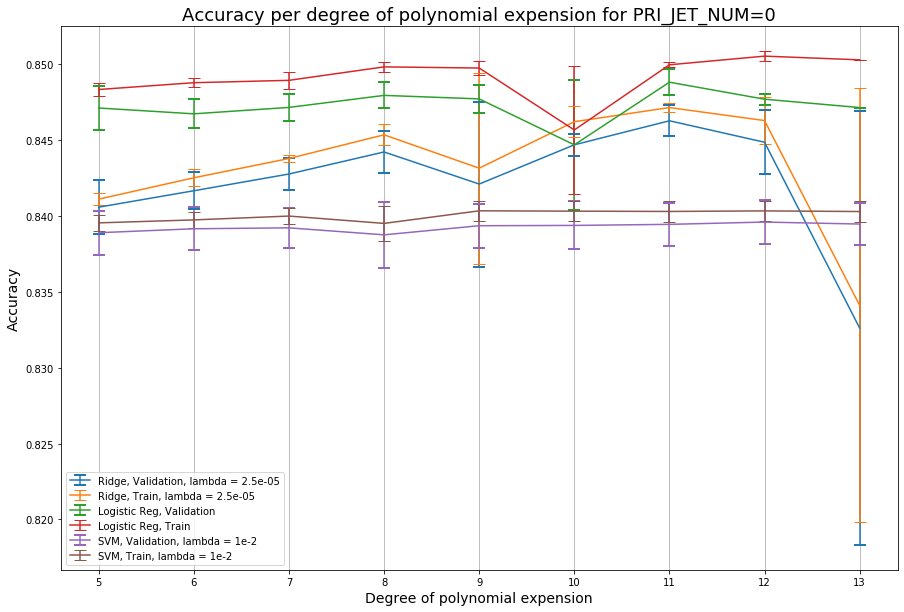

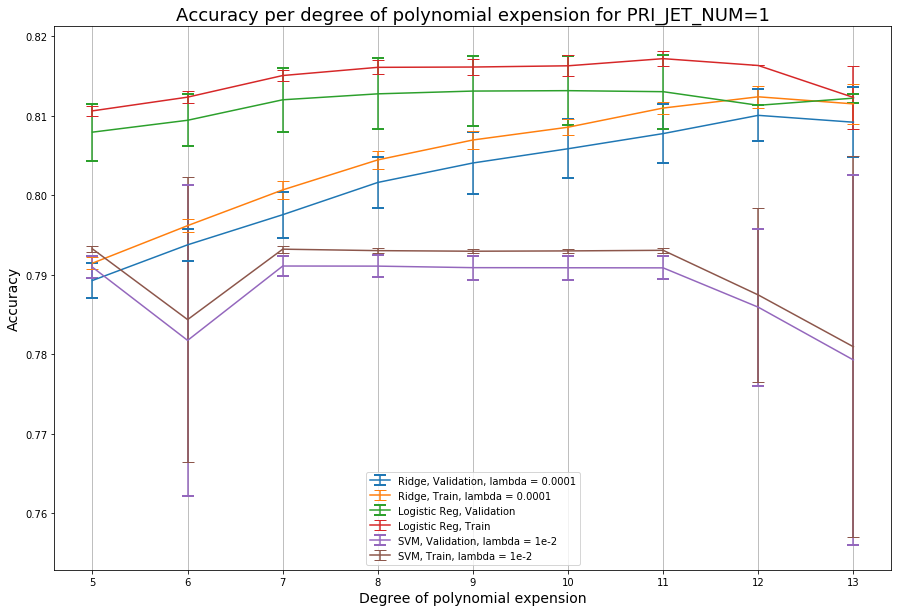

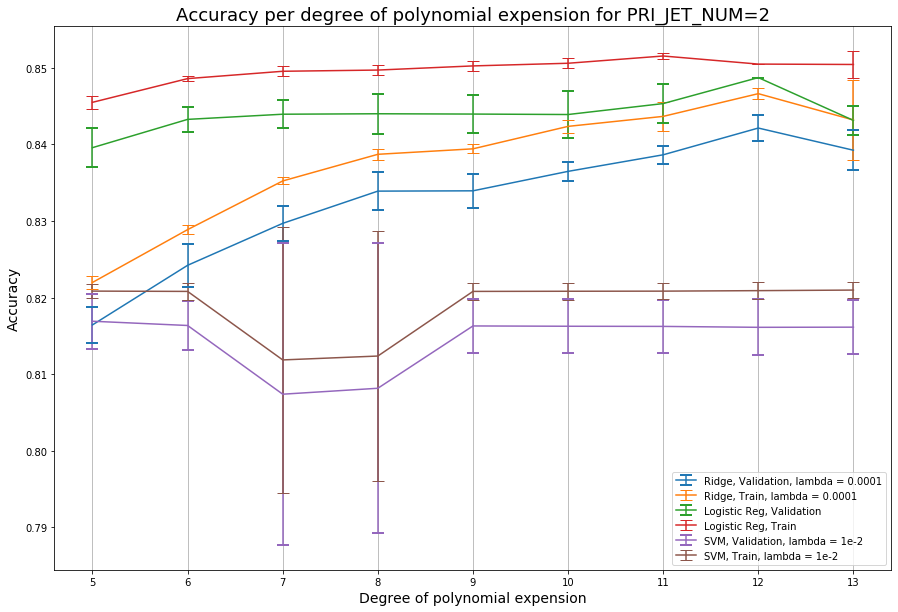

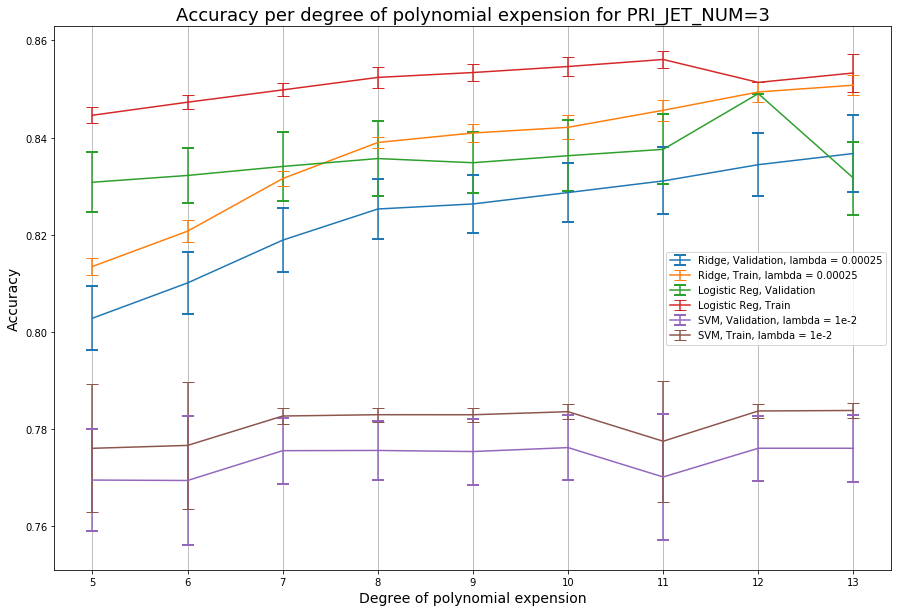

In [43]:
for i in range(4):
    plot_accuracy(validation_accuracy_ridge, validation_accuracy_log_svm, train_accuracy_ridge, train_accuracy_log_svm, POSSIBLE_DEGREES, POSSIBLE_LAMBDA_VALUES, i)

In [22]:
ridge_means = []
ridge_std = []
for i, ((best_lmda, _), (best_deg, _)) in enumerate([find_best_hyperparameters(validation_accuracy_ridge[i, 0, :, :, 0], POSSIBLE_LAMBDA_VALUES, POSSIBLE_DEGREES) for i in range(4)]):
    ridge_means.append(validation_accuracy_ridge[i, 0, best_deg, best_lmda, 0])
    ridge_std.append(validation_accuracy_ridge[i, 0, best_deg, best_lmda, 1])


log_means = []
log_std = []
for i, ((best_lmda, _), (best_deg, _)) in enumerate([find_best_hyperparameters(validation_accuracy_log_svm[i, 0, :, :, 0], POSSIBLE_LAMBDA_LOG, POSSIBLE_DEGREES) for i in range(4)]):
    log_means.append(validation_accuracy_log_svm[i, 0, best_deg, best_lmda, 0])
    log_std.append(validation_accuracy_log_svm[i, 0, best_deg, best_lmda, 1])

svm_means = []
svm_std = []
for i, ((best_lmda, _), (best_deg, _)) in enumerate([find_best_hyperparameters(validation_accuracy_log_svm[i, 1, :, :, 0], POSSIBLE_LAMBDA_SVM, POSSIBLE_DEGREES) for i in range(4)]):
    svm_means.append(validation_accuracy_log_svm[i, 1, best_deg, best_lmda, 0])
    svm_std.append(validation_accuracy_log_svm[i, 1, best_deg, best_lmda, 1])

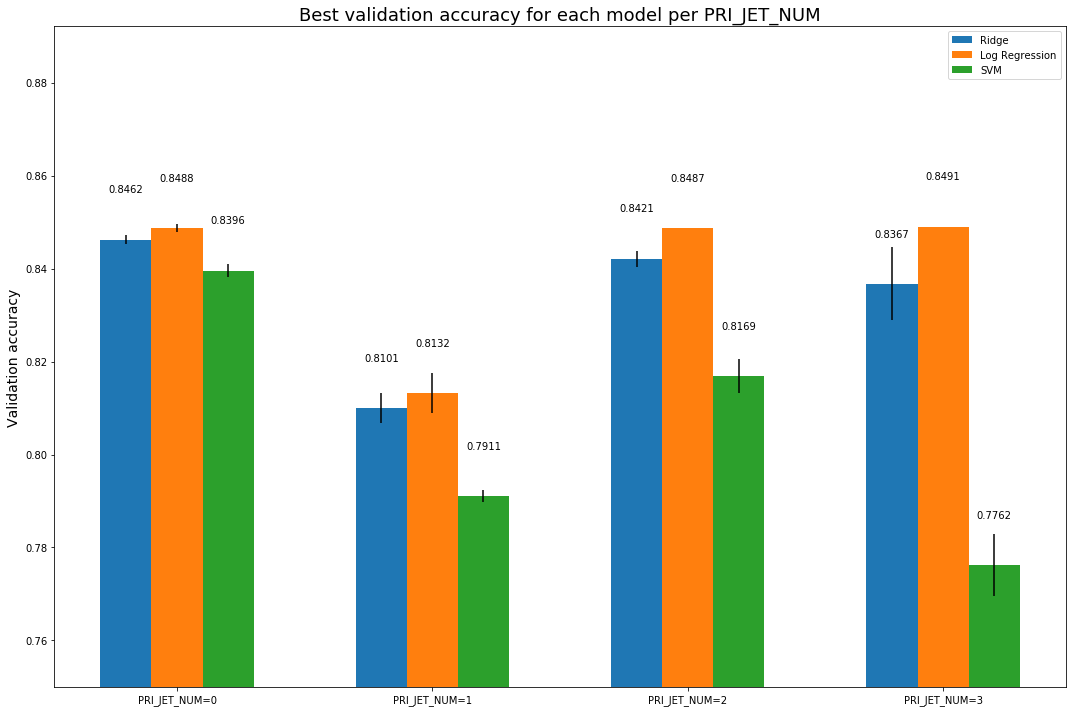

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))
labels = [f'PRI_JET_NUM={i}' for i in range(4)]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax.bar(x - width, ridge_means, width, yerr=ridge_std, label='Ridge')
rects2 = ax.bar(x, log_means, width, yerr=log_std, label='Log Regression')
rects3 = ax.bar(x+width, svm_means, width, yerr=svm_std, label='SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Validation accuracy', fontsize=14)
ax.set_title('Best validation accuracy for each model per PRI_JET_NUM', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(bottom=0.75)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 45),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.savefig('plots/best_val_acc.png')